<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 103 - Elementary Fluid Mechanics**

<hr />

# Velocity profiles

In this notebook, we will discuss a useful way to visualize a flow in fluid mechanics: the **velocity profile**.

To start, let's consider one of the most basic types of flow: the linear shear flow, often called **Couette flow**. This type of flow is generated, for example, between two parallel walls when one wall is moving and the other is stationary. In the figure below, the top wall is moving with velocity $U$, the lower wall is stationary:

<img src="Couette.svg" alt="velocity profile" width="300" align="center"/>

Because of the **no-slip condition**, the fluid next to each wall moves with it. The fluid next to the upper wall moves at velocity $U$, the fluid next to the lower wall is at rest.

The velocity profile depicts $u(y)$, the horizontal component of velocity as a function of vertical position, $y$. This increases linearly from the lower to the upper wall. In fact, the function is just

$$u(y) = Uy/H$$

The arrows indicate the direction that the fluid is moving, and the lengths of the arrows indicate the relative speed at that $y$ position.

### Shear stress
We can calculate the viscous shear stress at any location with the equation

$$\tau = \mu \frac{\mathrm{d}u}{\mathrm{d}y}$$

In fact, in Couette flow, shear stress is the same everywhere:

$$\tau = \mu U/H$$

This represents, e.g., the resistive force (per unit area) that the fluid applies (to the left) on the upper wall while the wall moves to the right.

It also represents the force per unit area that the lower wall must withstand in order to remain stationary. The fluid is trying to drag the lower wall to the right, so this must be balanced by some reaction force in the wall to the left.

The **rate of work** (per unit area) required to move the upper wall is $\dot{W} = \tau U$. This would be measured in units of, e.g., $W/m^2$.

### Plotting velocity profiles

The arrows are helpful, but you can also plot a velocity profile without them. For example, consider the following velocity:

$$u(y) = \frac{4U_c}{H^2} y (H - y)$$

The coefficient $U_c$ is a speed, and $H$ is the gap height.

Let's create this function:

In [1]:
u(y,Uc,H) = 4*Uc/H^2*y*(H-y) 

u (generic function with 1 method)

Suppose the gap height $H$ is 1 cm and the speed $U_c$ is 1 m/s. We will evaluate this velocity at a range of locations between 0 and $H$:

In [2]:
H = 0.01  # 1 cm = 0.01 m
Uc = 1.0
y = range(0,H,length=101) # 101 points to evaluate at, just to make it look smooth.

0.0:0.0001:0.01

Now we evaluate the velocity function at the range of $y$ locations. (Remember that the `.` vectorizes the evaluation of a function.)

In [3]:
u.(y,Uc,H)

101-element Array{Float64,1}:
 0.0                
 0.0396             
 0.0784             
 0.11639999999999999
 0.15360000000000001
 0.19               
 0.22559999999999997
 0.2604             
 0.2944             
 0.3276             
 0.36000000000000004
 0.3916             
 0.42239999999999994
 ⋮                  
 0.3916000000000001 
 0.3600000000000003 
 0.3275999999999999 
 0.2944000000000001 
 0.2604000000000003 
 0.22559999999999994
 0.19000000000000017
 0.15360000000000038
 0.11639999999999998
 0.0784000000000002 
 0.03959999999999977
 0.0                

Notice that $u$ is 0 at the beginning and end of the range. Let's plot it. But let's plot it as a velocity profile, which means we make $u$ the 'x' axis and $y$ the 'y' axis.

In [6]:
using Plots

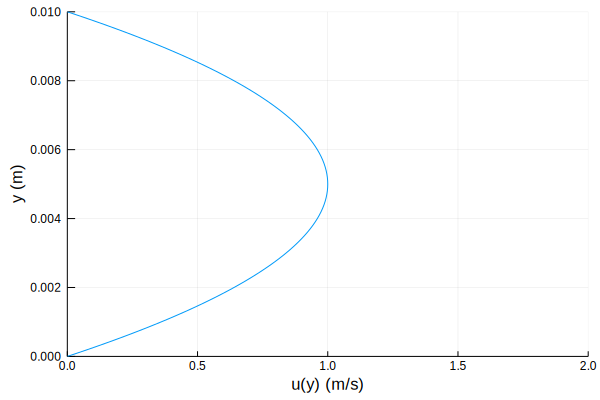

In [10]:
ps = plot(u.(y,Uc,H),y,xlim=(0,2Uc),ylim=(0,H),
    legend=false,xlabel="u(y) (m/s)",ylabel="y (m)")

The top and bottom of this plot suggest that these are stationary walls where the flow is at rest. In fact, this is the velocity profile associated with pressure-driven flow through the gap.

#### Dimensionless plots
We should get in the habit of making our plots "dimensionless". This has many benefits, including ensuring that the results are not dependent on the specific gap size and speed.

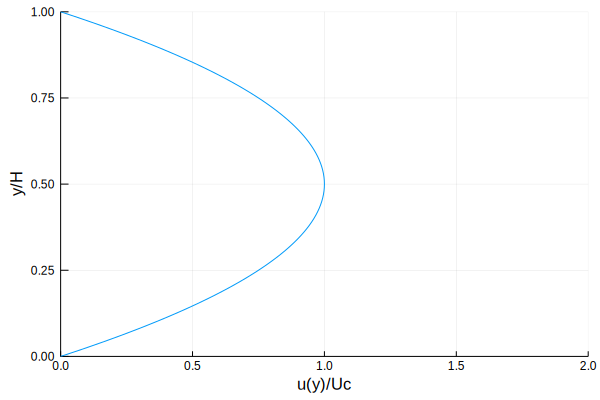

In [16]:
ps = plot(u.(y,Uc,H)/Uc,y/H,xlim=(0,2),ylim=(0,1),
    legend=false,xlabel="u(y)/Uc",ylabel="y/H",yticks=0:0.25:1)

Now we can read off the velocity as a fraction of the maximum (centerline) speed, and the position as a fraction of the gap height. There are no units on this plot, so it is irrelevant what system of units was used in the first place. (Notice that we also made sure that the centerline has its own tick mark, to make it easier to locate it.)